In [26]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

pd.set_option('display.max_rows',None)

In [75]:
train_df = pd.read_csv("./train.csv", parse_dates=["Crash Date/Time"])
test_df = pd.read_csv("./test.csv", parse_dates=["Crash Date/Time"])

In [107]:
train_df.shape, test_df.shape

test_df["Local Case Number"] = test_df["Local Case Number"].str.extract('(\d+)', expand=False).astype(float)
temp = test_df[test_df["Local Case Number"] == 6291]
print(temp)


        Id Report Number  Local Case Number                Agency Name  \
9626  9626         E7201             6291.0  Gaithersburg Police Depar   

     ACRS Report Type     Crash Date/Time Route Type        Road Name  \
9626     Injury Crash 2016-06-09 11:36:00     County  MUDDY BRANCH RD   

     Cross-Street Type Cross-Street Name  ... Speed Limit Driverless Vehicle  \
9626            County    DIAMONDBACK DR  ...          45                 No   

     Parked Vehicle Vehicle Year Vehicle Make Vehicle Model  \
9626             No         2014         TOYO          RAV4   

     Equipment Problems   Latitude  Longitude      Location  
9626          NO MISUSE  39.115013 -77.215665  3.1033 7.165  

[1 rows x 42 columns]


In [112]:

temp1= train_df[train_df["Fault"] == 1]
temp2= train_df[train_df["Fault"] == 0]
col = "Road Name"
print(temp1[col].value_counts())
print(temp2[col].value_counts())
#print(test_df[col].value_counts())
#values = np.where(train_df["Vehicle First Impact Location"] == train_df["Vehicle Second Impact Location"])
'''piv = pd.pivot_table(train_df, index=["Fault"], columns=["Vehicle Going Dir"], fill_value=0)
#plot pivot table as heatmap using seaborn
ax = sb.heatmap(piv, square=True)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=90 )
plt.tight_layout()
plt.show()
'''



GEORGIA AVE                                 1511
NEW HAMPSHIRE AVE                           1009
FREDERICK RD                                 790
ROCKVILLE PIKE                               628
CONNECTICUT AVE                              576
VEIRS MILL RD                                548
COLUMBIA PIKE                                496
COLESVILLE RD                                465
RANDOLPH RD                                  463
SHADY GROVE RD                               455
UNIVERSITY BLVD E                            366
RIVER RD                                     316
UNIVERSITY BLVD W                            306
OLD GEORGETOWN RD                            298
NORBECK RD                                   282
RIDGE RD                                     273
WOODFIELD RD                                 265
GERMANTOWN RD                                257
CLOPPER RD                                   246
EISENHOWER MEMORIAL HWY                      245
MONTGOMERY VILLAGE A

'piv = pd.pivot_table(train_df, index=["Fault"], columns=["Vehicle Going Dir"], fill_value=0)\n#plot pivot table as heatmap using seaborn\nax = sb.heatmap(piv, square=True)\nplt.setp( ax.xaxis.get_majorticklabels(), rotation=90 )\nplt.tight_layout()\nplt.show()\n'

<AxesSubplot:xlabel='Collision Type', ylabel='Count'>

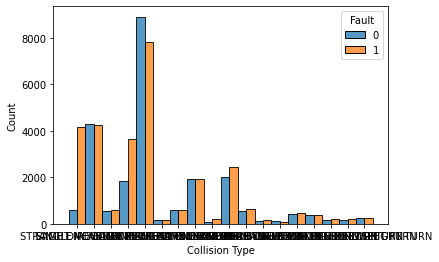

In [85]:
#sb.histplot(binwidth=0.5, x="ACRS Report Type", hue="Fault", data=train_df, stat="count", multiple="dodge")
#sb.histplot(binwidth=0.5, x="Injury Severity", hue="Fault", data=train_df, stat="count", multiple="dodge")
sb.histplot(binwidth=0.5, x="Collision Type", hue="Fault", data=train_df, stat="count", multiple="dodge")

In [ ]:
map_dict = dict()
map_dict["ACRS Report Type"] = {'Property Damage Crash':0,'Injury Crash':1,'Fatal Crash':2}
map_dict["Injury Severity"] = {'NO APPARENT INJURY':0,'POSSIBLE INJURY':1,'SUSPECTED MINOR INJURY':2,
                               'SUSPECTED SERIOUS INJURY':3,'FATAL INJURY':4}
map_dict["Vehicle Damage Extent"] = {'OTHER':0,'NO DAMAGE':1,'SUPERFICIAL':2,'FUNCTIONAL':3,'DISABLING':4,'DESTROYED':5,
                                    'UNKNOWN':2.5}

numeric_col = ["Speed Limit", "Vehicle Year", "Latitude", "Longitude", "Location"]
ordinal_col = ["ACRS Report Type", "Injury Severity", "Vehicle Damage Extent"]
#, "Local Case Number"
label_encoder_col = ["Report Number", "Road Name", "Cross-Street Name", "Person ID", "Circumstance",
                    "Drivers License State", "Vehicle ID", "Vehicle Make", "Vehicle Model"]
binary_encoder_col = ["Agency Name", "Route Type", "Cross-Street Type", "Municipality", "Related Non-Motorist", 
                      "Collision Type", "Weather", "Surface Condition", "Light", "Traffic Control", "Driver Substance Abuse",
                     "Non-Motorist Substance Abuse", "Vehicle First Impact Location", "Vehicle Second Impact Location",
                     "Vehicle Body Type", "Vehicle Movement", "Vehicle Continuing Dir", "Vehicle Going Dir",
                      "Driverless Vehicle", "Parked Vehicle", "Equipment Problems"]
date_time_col = ["Crash Date/Time"] # 04/30/2018 02:00:00 AM
useless_col = ["Off-Road Description"]
target_col = ["Fault"]

same_value_col = [("Vehicle First Impact Location", "Vehicle Second Impact Location"),
                 ("Driver Substance Abuse", "Non-Motorist Substance Abuse"),
                 ("Vehicle Continuing Dir", "Vehicle Going Dir")]
pre_process_col = ["Related Non-Motorist", "Non-Motorist Substance Abuse", "Vehicle Year", "Location"]

remove_rows_if_na = ["Vehicle Damage Extent"]


In [ ]:
for col in remove_rows_if_na:
    train_df = train_df[~train_df[col].isna()] #removed 397 rows

'''
test_df["Local Case Number"] = test_df["Local Case Number"].fillna(-1)
test_df["Local Case Number"] = test_df["Local Case Number"].astype('int')
test_df["Local Case Number"] = test_df["Local Case Number"].replace('-1', np.nan)
'''
    
from sklearn import preprocessing
import category_encoders as ce

def cleandata(train_df):
    for col in label_encoder_col:
        #print(train_df[col].dtype)
        le = preprocessing.LabelEncoder()
        train_df[col] = le.fit_transform((train_df[col]))

    for key in map_dict:
        train_df[key].replace(map_dict[key], inplace=True)

    encoder = ce.BinaryEncoder(cols=binary_encoder_col)
    train_df = encoder.fit_transform(train_df)

    train_df["year"] = train_df["Crash Date/Time"].dt.year
    train_df["month"] = train_df["Crash Date/Time"].dt.month
    train_df["day"] = train_df["Crash Date/Time"].dt.day
    train_df["hour"] = train_df["Crash Date/Time"].dt.hour
    train_df["dayofweek"] = train_df["Crash Date/Time"].dt.dayofweek
    train_df['dayofyear'] = train_df["Crash Date/Time"].dt.dayofyear
    train_df["quarter"] = train_df["Crash Date/Time"].dt.quarter

    train_df['Location'].replace(',', ' ', regex=True, inplace=True)
    train_df[['Location_x', 'Location_y']] = train_df['Location'].str.split(' ', expand=True)
    train_df.shape
    return train_df
#train_df[['Location_x', 'Location_y']] = train_df['Location_x'].str.split(',', expand=True)

#print(train_df.shape)
#print(test_df.shape)

In [ ]:
print(test_df["Local Case Number"].value_counts())

In [ ]:
train_df.head()
X_train = cleandata(train_df)
X_train = train_df.drop(["Crash Date/Time", "Off-Road Description", "Fault", "Location"], axis=1)
test_df = cleandata(test_df)
test_uniq = test_df["Id"]
X_test = test_df.drop(["Crash Date/Time", "Off-Road Description", "Id", "Location"], axis=1)

#X_train = X_train.drop(["Crash Date/Time", "Off-Road Description", "Fault", "Location"], axis=1)
#X_test = X_test.drop(["Crash Date/Time", "Off-Road Description", "Fault", "Location"], axis=1)
#X_train.dropna(axis=0, how='any', inplace=True)
print(X_train.shape)
#print(train_df["Fault"].to_numpy().shape)
#X_train.isna().sum()
#print(X_train['Location_x'])
#value_counts()
#nunique

In [ ]:
train_df[ordinal_col].head()
#value_counts()
#nunique

In [ ]:
for col in ordinal_col:
    print(col)
    train_df[col] = train_df[col].apply(lambda x: map_dict[col][x])

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
print("Start of the model")
clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.5, max_depth=5, random_state=0)
#X_train = train_df.drop(["Crash Date/Time", "Off-Road Description", "Fault", "Location"], axis=1)
#print(X_train.info(verbose=True, null_counts=True))
'''
X_train = train_df[ordinal_col].to_numpy()

clf.fit(X_train, y_train)
clf.score(X_train, y_train)
'''

In [ ]:
y_train = np.ravel(train_df[target_col])
#print(np.ravel(y_train))
clf.fit(X_train, y_train)
y_test = clf.predict(X_test)
submission = pd.DataFrame({'Id': test_uniq, "Fault": y_test})

submission.to_csv('submission.csv', index=False)